#0. 데이터 설치 및 확인

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
PATH = "/content/drive/MyDrive/kubig/ML"
train_df = pd.read_csv(PATH+"/train.csv")
test_df = pd.read_csv(PATH+"/test.csv")
gender_df = pd.read_csv(PATH+"/gender_submission.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#PassengerId: 승객번호
#Survived: 생존 여부 (0 사망, 1 생존)
#Pclass: 1등석, 2등석, 3등석
#Name:이름
#Sex: 성별
#Age: 연령
#SibSp: 형제자매/배우자 수
#Parch: 타이타닉에 탑승한 부모/자녀 수
#Ticket: 티켓 번호
#Fare: 승객 요금
#Cabin: 객실 번호
#Embarked: 기항지 위치, C(Cherbourg), Q(Queenstown), S(Southampton)

In [6]:
test_df.head()
#오잉잉 Survived는 어디로.......

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.shape
#183개

(891, 12)

#1. 데이터 결측치 처리

In [49]:
train_df.isnull().sum()
#Age Pclass별 평균으로 결측치 보간
#Cabin 열 제거
#Embarked 결측치 포함 행 제거

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
train_df = train_df.drop(columns=['Cabin'])

In [51]:
train_df=train_df.dropna(subset=['Embarked'])

In [52]:
train_df['Age'].fillna(train_df.groupby('Pclass')['Age'].transform('mean'), inplace=True)

In [57]:
train_df.isnull().sum()
#얏호!

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Sex_male       0
dtype: int64

#2. 변수 사이들 간 생존 가능성 차이 비교

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


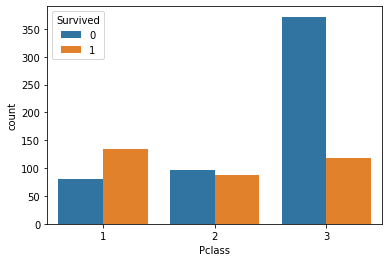

In [25]:
sns.countplot('Pclass',hue='Survived',data=train_df)
pl.show()
#3등석이 제일 많이 사망함

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


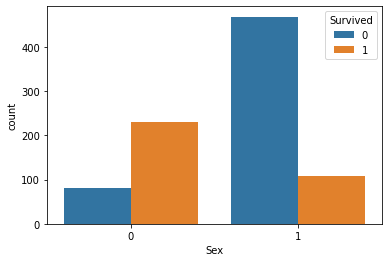

In [26]:
sns.countplot('Sex',hue='Survived',data=train_df)
pl.show()
#남자가 많이 사망

In [29]:
train_df['Age'].describe()

count    889.000000
mean      29.241974
std       13.173524
min        0.420000
25%       22.000000
50%       26.000000
75%       36.500000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


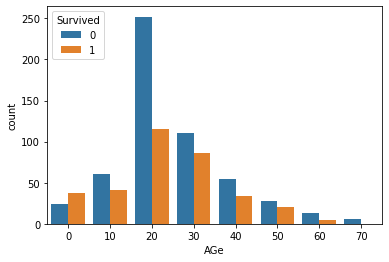

In [34]:
bins=[0,10,20,30, 40,50,60, 70, 80]
#bins_label=['Children', 'Adolescence', 'Young Adult', 'Adult', 'Elderly']
bins_label=['0', '10', '20', '30', '40', '50', '60', '70']
train_df["AGe"] = pd.cut(train_df["Age"], bins, right=False, labels=bins_label)

sns.countplot('AGe',hue='Survived',data=train_df)
pl.show()
#20대가 가장 많이 사망하하고, 많이 생존했다

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


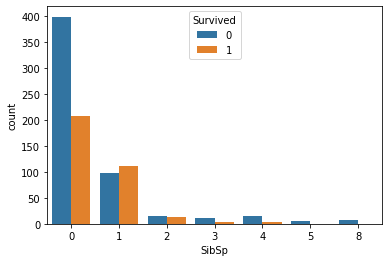

In [36]:
sns.countplot('SibSp' ,hue='Survived',data=train_df)
pl.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


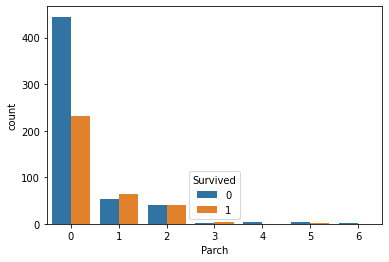

In [37]:
sns.countplot('Parch',hue='Survived',data=train_df)
pl.show()

In [44]:
train_df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


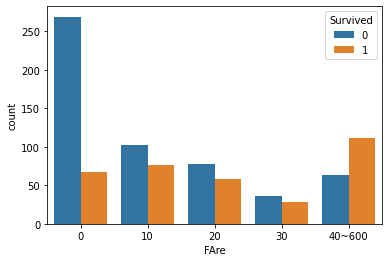

In [47]:
bins=[0,10,20,30, 40, 600]
bins_label=['0', '10', '20', '30', '40~600']
train_df["FAre"] = pd.cut(train_df["Fare"], bins, right=False, labels=bins_label)

sns.countplot('FAre',hue='Survived',data=train_df)
pl.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


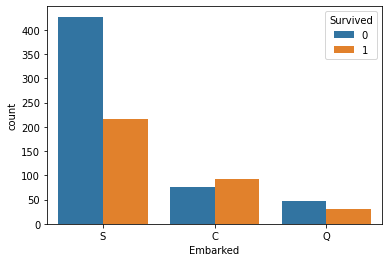

In [55]:
sns.countplot('Embarked',hue='Survived',data=train_df)
pl.show()

#2-1. 범주형 자료 변환: Sex, Embarked

In [58]:
train_df = pd.get_dummies(train_df, columns = ["Sex"], drop_first=True)

KeyError: ignored

In [59]:
train_df=train_df.rename(columns={'Sex_male':'Sex'})
#Sex가 male이면 1, female이면 0

In [60]:
train_df=pd.get_dummies(train_df, columns=["Embarked"])

In [61]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f806a10ba00>,
      dtype=object)

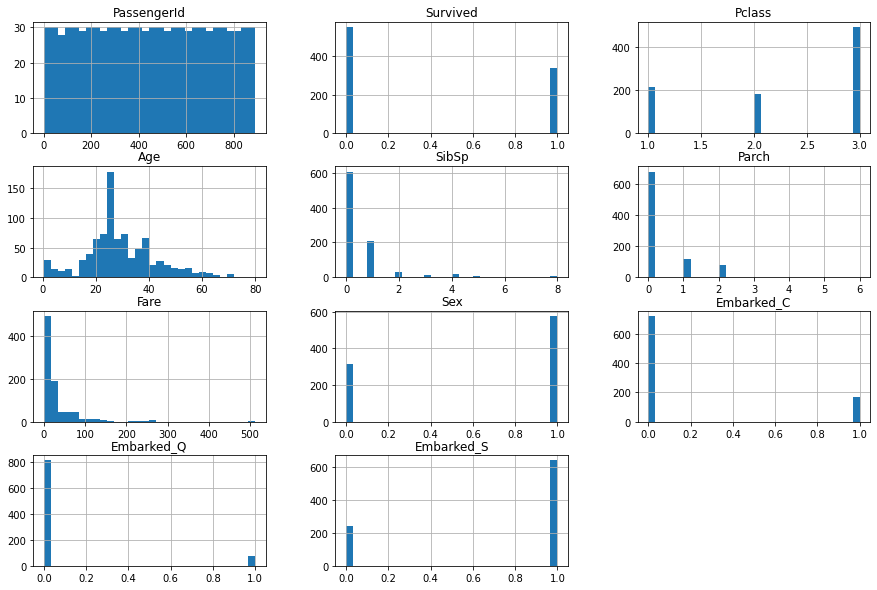

In [62]:
train_df.hist(figsize = (15,10), bins= 30)

#3. Name, Ticket 제거

In [63]:
train_df = train_df.drop(columns = ['Name', 'Ticket'])

3-1. Fare 아웃라이어 제거

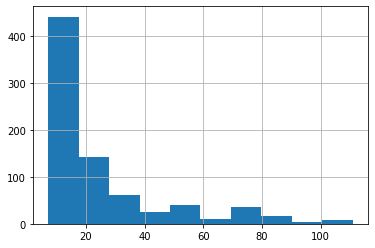

In [65]:
p1 = train_df['Fare'].quantile(0.95)
p2 = train_df['Fare'].quantile(0.05)
train_df = train_df[(train_df['Fare'] < p1) & (train_df['Fare'] > p2)]
train_df['Fare'].hist()

4. 분석 모시기~

In [68]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [69]:
from sklearn.ensemble import RandomForestRegressor
model_reg = RandomForestRegressor( random_state = 42)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

def display_scores(scores):
  print("Score:", scores)
  print("Mean : ", scores.mean())
  print("Standard deviation : " , scores.std())
  

In [71]:
model_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [72]:
pred = model_reg.predict(X_train)
mse = mean_squared_error(y_train, pred)
mae = mean_absolute_error(y_train, pred)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

scores = cross_val_score(model_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

0.022231521739130435 0.10166666666666667 0.14910238676537152
Score: [0.37971658 0.40933037 0.36753973 0.42795922 0.47920104]
Mean :  0.41274938841562114
Standard deviation :  0.039481463161517565


In [73]:
final_pred = model_reg.predict(X_test)

final_mse = mean_squared_error(y_test, final_pred)
final_mae = mean_absolute_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)

print(final_mse, final_mae, final_rmse)

0.13548818565400844 0.24848101265822786 0.36808719843809895


5. 그 후 수정...